In [15]:
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pyflux as pf
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
df = pd.read_csv('../data/ticker.csv.bz2', parse_dates=['createtime'], compression='bz2')

In [3]:
eth = df.ix[df['pair'] == 'XETHZEUR']

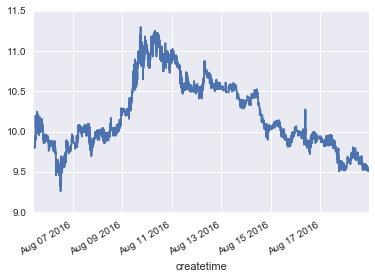

In [5]:
eth.set_index('createtime')['last_price'].ix[:].plot()

In [6]:
price = eth.set_index('createtime')['last_price']

In [11]:
model = pf.GASLLEV(data=price.values, family=pf.GASNormal())

In [12]:
x = model.fit()

In [24]:
x.summary()

Normal GAS LLM                                                                                            
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: 157365.91                         
End Date: 103027                                        AIC: -314727.82                                   
Number of observations: 103027                          BIC: -314708.7345                                 
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
SC(1)                                    1.0472     0.0077     135.155  0.0      (1.032 | 1.0623)         
Normal Scale                         

/Users/fwilhelm/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


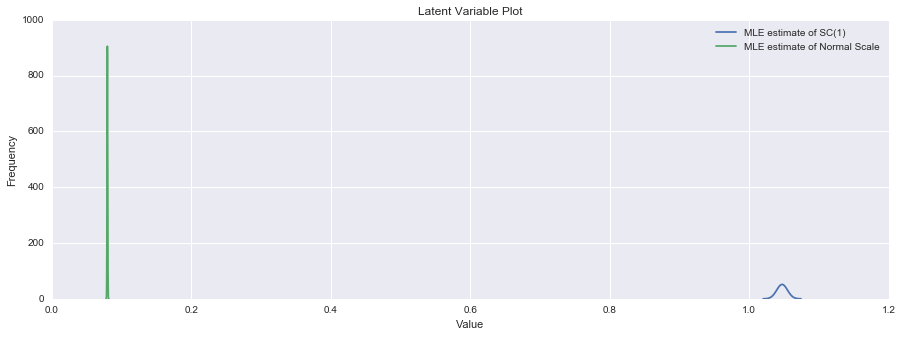

In [25]:
model.plot_z(figsize=(15,5))

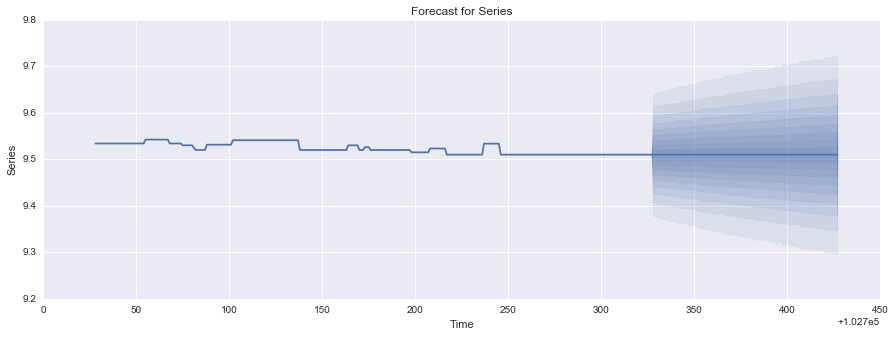

In [26]:
model.plot_predict(h=100,past_values=300,figsize=(15,5))